# Machine Learning for Regression
This is a practise notebook create during week-2 of ML Zoomcamp.

***

## Import modules

In [32]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Preparation

In [5]:
PATH_DATA = '../work/data.csv'

In [6]:
df = pd.read_csv(PATH_DATA)
df.shape

(11914, 16)

## Standardize column names and features

In [22]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


There is some inconsistency in the way feature are defined. 

## Standardize column names

In [23]:
# Fix column names
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

## Standardize categorical features

In [24]:
# Find string columns and standardize values
list_features_cat = df.dtypes[df.dtypes == 'object'].index.to_list()
list_features_cat

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [25]:
for col in list_features_cat:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [26]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


***

# Exploratory Data Analysis

In [33]:
for col in df.columns:
    print(col, df[col].dtype)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make object
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model object
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year int64
[2011 2012 2013 1992 1993]
28

engine_fuel_type object
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp float64
[335. 300. 230. 320. 172.]
356

engine_cylinders float64
[ 6.  4.  5.  8. 12.]
9

transmission_type object
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels object
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors float64
[ 2.  4.  3. nan]
3

market_category object
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size object
['compact' 'midsize' 'large']
3

vehicle_style object
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg int64
[26 28 27 25 24]
59

city_mpg int6

## Distribution of Target (Price)

In [31]:
df['msrp'].describe()

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: msrp, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

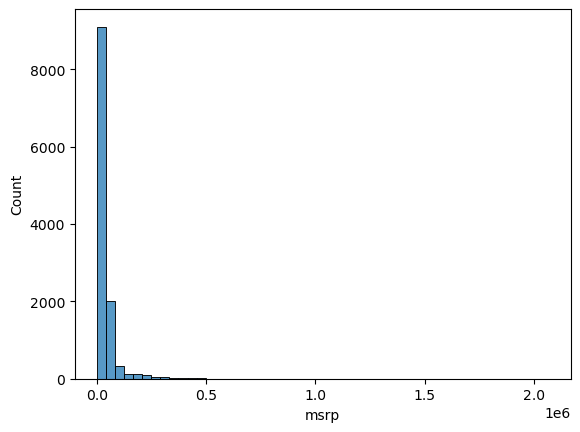

In [40]:
# Histogram of all data
sns.histplot(df['msrp'], bins=50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

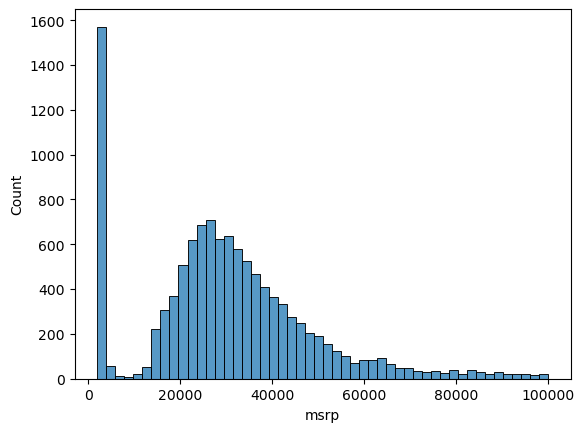

In [41]:
# Histogram of msrp < 100000
sns.histplot(df['msrp'][df['msrp'] < 100000], bins=50)

In [42]:
np.log([1,10, 100, 1000, 10000])

array([0.        , 2.30258509, 4.60517019, 6.90775528, 9.21034037])

In [43]:
np.log(0)

/tmp/ipykernel_64/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [45]:
# Create msrp_log column 
df['msrp_log'] = np.log1p(df['msrp'])
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,msrp_log
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,10.739349
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650,10.612779
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350,10.500977
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450,10.290483
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500,10.448744


In [47]:
df['msrp_log'].describe()

count    11914.000000
mean        10.113729
std          1.105703
min          7.601402
25%          9.952325
50%         10.308819
75%         10.650939
max         14.541078
Name: msrp_log, dtype: float64

<AxesSubplot:xlabel='msrp_log', ylabel='Count'>

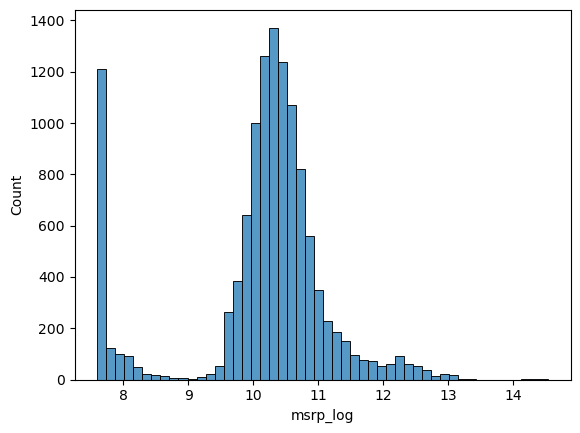

In [46]:
# Histogram of msrp_log
sns.histplot(df['msrp_log'], bins=50)

In [48]:
## Missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
msrp_log                0
dtype: int64

*** 

# Setting up the validation framework

In [84]:
n = len(df)


n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

print(n_train, n_val, n_test)

7150 2382 2382


In [86]:
# Datasets 
df_train = df.iloc[:n_train]
df_val   = df.iloc[n_train: n_train+n_val]
df_test  = df.iloc[n_train+n_val:]

In [87]:
# check shapes for split validity
df_train.shape, df_val.shape, df_test.shape

((7150, 17), (2382, 17), (2382, 17))

In [88]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [89]:
# Shuffle dataset 
df_train = df.iloc[idx[:n_train]]
df_val   = df.iloc[idx[n_train: n_train+n_val]]
df_test  = df.iloc[idx[n_train+n_val:]]

In [90]:
df_train.shape, df_val.shape, df_test.shape

((7150, 17), (2382, 17), (2382, 17))

In [93]:
# Look for changing index in the splitted dataframe
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,msrp_log
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410,9.575747
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685,9.887663
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795,9.893235
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000,7.601402
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260,10.937757


## Log variables

In [95]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [96]:
y_train = np.log1p(df_train.msrp.values)
y_val   = np.log1p(df_val.msrp.values)
y_test  = np.log1p(df_test.msrp.values)

In [97]:
# Delete the msrp feature to accidentaly use it 
del df_train['msrp']
del df_train['msrp_log']
del df_val['msrp']
del df_val['msrp_log']
del df_test['msrp']
del df_test['msrp_log']

In [98]:
len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

***

# Linear Regression

In [141]:
X = [
    [148, 24, 13],
    [128, 45, 5],
    [118, 74, 67],
    [178, 4, 55]
]

X = np.array(X)
X

array([[148,  24,  13],
       [128,  45,   5],
       [118,  74,  67],
       [178,   4,  55]])

In [132]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1.])

In [133]:
X = np.column_stack([ones, X])
X

array([[  1., 148.,  24.,  13.],
       [  1., 128.,  45.,   5.],
       [  1., 118.,  74.,  67.],
       [  1., 178.,   4.,  55.]])

In [134]:
y = [100, 200, 125, 435]

In [135]:
XTX = X.T.dot(X)
XTX

array([[4.0000e+00, 5.7200e+02, 1.4700e+02, 1.4000e+02],
       [5.7200e+02, 8.3896e+04, 1.8756e+04, 2.0260e+04],
       [1.4700e+02, 1.8756e+04, 8.0930e+03, 5.7150e+03],
       [1.4000e+02, 2.0260e+04, 5.7150e+03, 7.7080e+03]])

In [136]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 4.82521880e+04, -2.89544064e+02, -2.60171367e+02,
         7.75474553e+01],
       [-2.89544064e+02,  1.73748702e+00,  1.56115917e+00,
        -4.65405133e-01],
       [-2.60171367e+02,  1.56115917e+00,  1.40311419e+00,
        -4.18252595e-01],
       [ 7.75474553e+01, -4.65405133e-01, -4.18252595e-01,
         1.25036044e-01]])

In [137]:
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0., -0.,  0.],
       [-0.,  1., -0.,  0.],
       [-0.,  0.,  1.,  0.],
       [ 0.,  0., -0.,  1.]])

In [138]:
w = XTX_inv.dot(X.T).dot(y)
w0 = w[0]
w = w[1:]

w0, w

(-32965.32352952419, array([199.47058824, 175.29411765, -51.02941176]))

In [142]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [143]:
train_linear_regression(X, y)

(-32965.32352952419, array([199.47058824, 175.29411765, -51.02941176]))

***

# Car Price Baseline model 

In [163]:
list_features_num = df_train.dtypes[df_train.dtypes != 'object'].index.to_list()
list_features_num

['year',
 'engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'highway_mpg',
 'city_mpg',
 'popularity']

In [167]:
list_features_num.remove('year') if 'year' in list_features_num else list_features_num
base = list_features_num.copy()
base

['engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'highway_mpg',
 'city_mpg',
 'popularity']

In [176]:
df_train[base].head()

,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
0,148.0,4.0,2.0,33,24,1385
1,132.0,4.0,4.0,32,25,2031
2,148.0,4.0,4.0,37,28,640
3,90.0,4.0,3.0,18,16,873
4,385.0,8.0,4.0,21,15,5657


In [191]:
# Dealing with missing values 
df_train[base].isnull().sum()

# 1- fillna(0.0)
df_train[base] = df_train[base].fillna(0.0)

# 2- fillna(mean)
#df_train[base] = df_train[base].fillna(mean)

## Train Basemodel 

In [203]:
X_train = df_train[base].values
X_train

array([[1.480e+02, 4.000e+00, 2.000e+00, 3.300e+01, 2.400e+01, 1.385e+03],
       [1.320e+02, 4.000e+00, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03],
       [1.480e+02, 4.000e+00, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02],
       ...,
       [2.850e+02, 6.000e+00, 4.000e+00, 2.200e+01, 1.700e+01, 5.490e+02],
       [5.630e+02, 1.200e+01, 4.000e+00, 2.100e+01, 1.300e+01, 8.600e+01],
       [2.000e+02, 4.000e+00, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02]])

In [204]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [206]:
w0, w = train_linear_regression(X_train, y_train)

In [208]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.26561572,  9.4775669 ,  9.75393382, ..., 10.40828408,
       12.14532154, 10.08298804])

<AxesSubplot:ylabel='Count'>

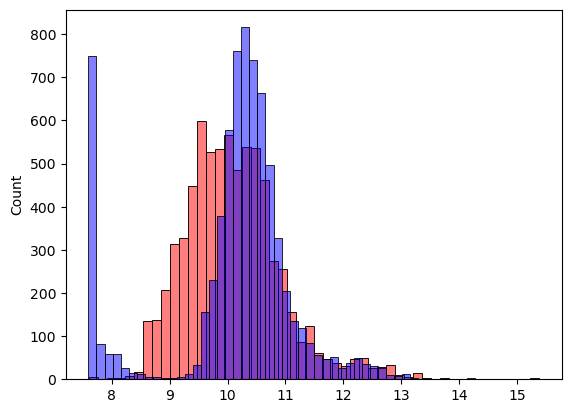

In [213]:
sns.histplot(y_pred, color='red', bins=50, alpha=0.5, legend='pred')
sns.histplot(y_train, color='blue', bins=50, alpha=0.5, legend='train')

***

# RSME

In [214]:
def rsme(y, y_pred):
    sqerror = (y - y_pred)**2
    mse = sqerror.mean()
    return np.sqrt(mse)

In [215]:
rsme(y_train, y_pred)

0.737655612196539

***